In [1]:
#pip install --upgrade --force-reinstall matplotlib

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import json
import re

In [3]:
import matplotlib as plt

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

#### Učitavanje podataka

In [5]:
data_attrition=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [6]:
data_attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


#### Proveravanje null vrednosti u skupu podataka

In [7]:
data_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
##### Proveravamo da li nam se u skupu podataka 
maska = data_attrition.isnull() | (data_attrition == '') | (data_attrition == 'None') | (data_attrition == ' ')

In [9]:
broj_null_vrednosti = maska.sum()
print(broj_null_vrednosti)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
### Provera duplikata je takodje jedna od tehnika koje su neophodne u generisanju i preprocesiranju modela mašinskog učenja
## Nekada se radi svesno oversemplovanje ili undersamplovanje skupa podataka za treniranje medjutim u ovom slučaju je
# bolje na početku proveriti i uveriti se da li u samom startu postoje vrednosti koje su duplirane
### 

In [11]:
podaci_duplirani= data_attrition.duplicated()

In [12]:
# SADA DA VIDIMO DA LI SU PODACI DUPLIRANI
data_attrition[podaci_duplirani]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [13]:
#-Podaci u početnom skupu podataka nisu duplirani i nalaze se normalno 

In [14]:
#### Provera unique vrednosti unutar kolona 
#### kako bi izbegle i izbrisale konstantne vrednosti u skupu podataka koje nisu korisne ili su neke informacije
### poput ID kolona koji nisu kasnije relevantne za analizu

In [15]:
data_attrition.shape

(1470, 35)

In [16]:
for kolona in data_attrition.columns:
    print(f"{kolona}: Ima jedinstvenih vrednosti {data_attrition[kolona].nunique()}")
    print("######################################################")

Age: Ima jedinstvenih vrednosti 43
######################################################
Attrition: Ima jedinstvenih vrednosti 2
######################################################
BusinessTravel: Ima jedinstvenih vrednosti 3
######################################################
DailyRate: Ima jedinstvenih vrednosti 886
######################################################
Department: Ima jedinstvenih vrednosti 3
######################################################
DistanceFromHome: Ima jedinstvenih vrednosti 29
######################################################
Education: Ima jedinstvenih vrednosti 5
######################################################
EducationField: Ima jedinstvenih vrednosti 6
######################################################
EmployeeCount: Ima jedinstvenih vrednosti 1
######################################################
EmployeeNumber: Ima jedinstvenih vrednosti 1470
######################################################
EnvironmentSatisfactio

In [17]:
for kolona in data_attrition.columns:
    if data_attrition[kolona].nunique()==1:
        print(f"{kolona}: Ima jednu jedinstvenu vrednosti {data_attrition[kolona].nunique()}")
        print("######################################################")
    elif data_attrition[kolona].nunique()==data_attrition.shape[0]:
        print(f"{kolona}: Ima sve različite vrednosti")
        print("######################################################")
        

EmployeeCount: Ima jednu jedinstvenu vrednosti 1
######################################################
EmployeeNumber: Ima sve različite vrednosti
######################################################
Over18: Ima jednu jedinstvenu vrednosti 1
######################################################
StandardHours: Ima jednu jedinstvenu vrednosti 1
######################################################


In [18]:
## pre nego što ove informacije budu iskorišćene za prečišćavanje skupa podataka možemo videti raspodelu

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

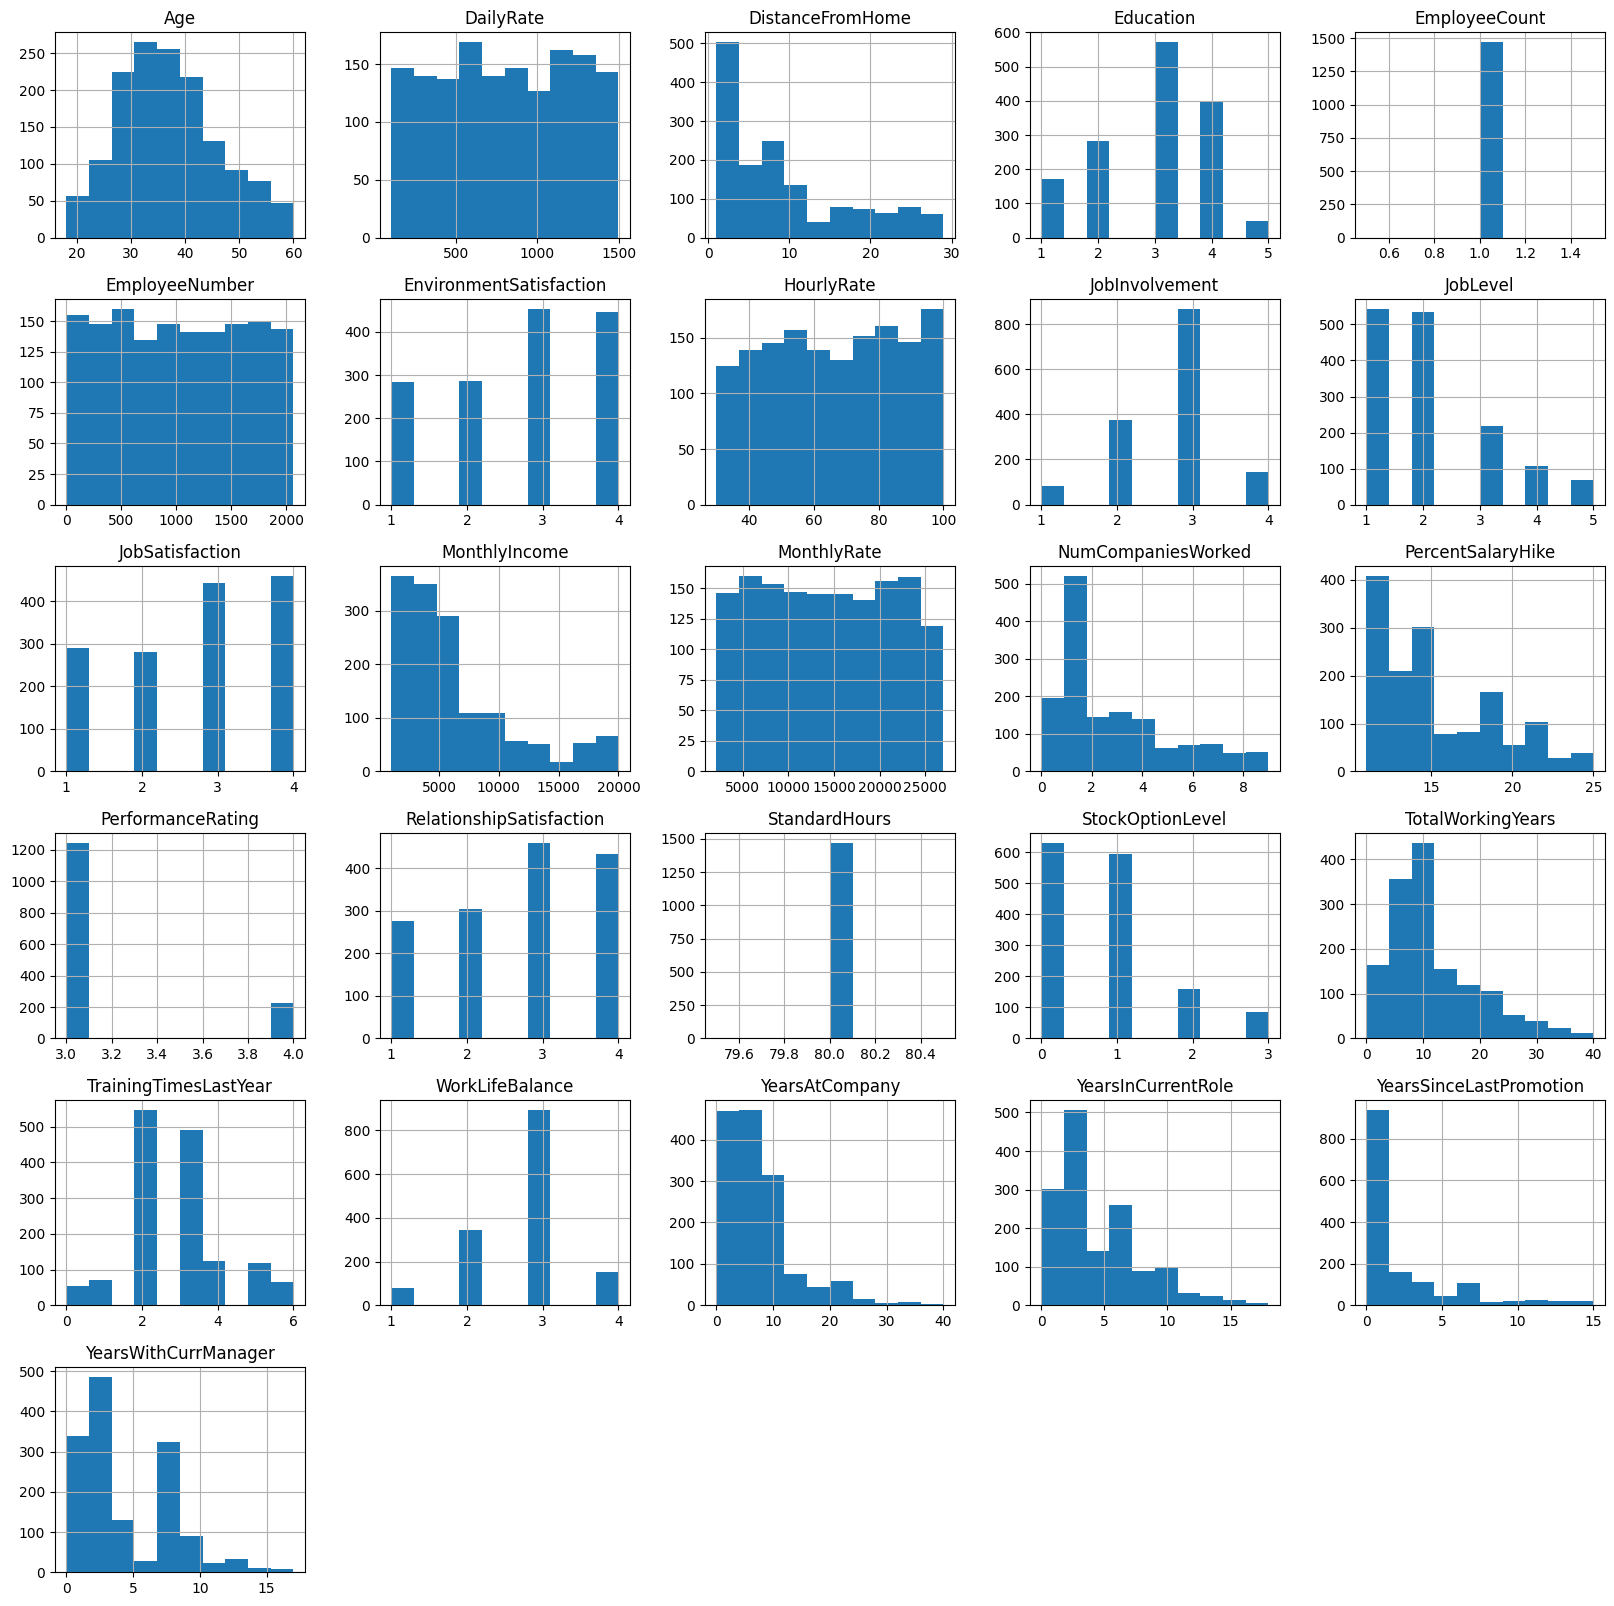

In [19]:
data_attrition.hist(figsize=(20,20))

In [20]:
# Na osnovu prikazanih histograma mogu se izneti sl. zaključci:
# - Dobra većina varijabli imaju distribuciju gde su krajevi raspodele izuzetno opterećeni,
## tako reći to su raspodele verovatnoća čiji repovi (krajevi) nisu eksponencijalno ograničeni. 
# To onda znači da oni opadaju sporije od ekponencijalne raspodele.
# u našem slučaju to bi značilo da većina varijabli ima raspodelu nakrivljenu na desno.
### Takođe vidimo da su neke varijable konstantne i da je moguće da se izbace i ne proučavaju dalje.

In [21]:
##### Ovde se zakljucuje da je neophodno ukoliti kolone koje imaju standardnu vrednost poput EmployeeCount, StandardHours Over18 a da
#varijabla EmployeeNumber predstavlja 

In [22]:
data_attrition.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True                      )

In [23]:
data_attrition.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [24]:
### yes - 1; no -0
# label_encoder_output = LabelEncoder()
# data_attrition['Attrition'] = label_encoder_output.fit_transform(data_attrition['Attrition'])

In [25]:
data_attrition['Attrition'] = data_attrition['Attrition'].map({'Yes': 1, 'No': 0})


In [26]:
data_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [27]:
#data_attrition.head(5).to_csv("sample21.07.csv", index=False)

In [28]:
## sledeći korak je da se odradi uklanjanje outlier-a 
# - tu mogu da se koriste dve technike sada ćemo odraditi tehniku koriščenjem Z-score-a ali posto je takav vid uklanjanja oulier-a
## preporucljiv iskljucivo sa numerickim vrednostima potrebno je da se dobro razumeju sve kolone i shodno tome da se razdvoje
#### u odgovarajuće tipove podatka

In [29]:
data_attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [30]:
numeričke_varijable=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
                     'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
                    'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                    'YearsSinceLastPromotion']

In [31]:
kategoričke_nominalne=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [32]:
izlazna_varijabla=['Attrition']

In [33]:
kategoričke_binarne=['Gender', 'OverTime']

In [34]:
kategoričke_ordinalne=['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
                       'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
                       'StockOptionLevel', 'WorkLifeBalance']

In [35]:
###### Ispod je predstavljena tehnika otklanjanja outlier-a na osnovu z-scorea

In [36]:
data_attrition.shape

(1470, 31)

In [38]:
###
import numpy as np
from scipy import stats

In [39]:
############### sada zakomentarisano

In [44]:
############### sada zakomentarisano
# z_skorovi = np.abs(stats.zscore(data_attrition[numeričke_varijable]))
# data_attrition_outlier_cleaned = data_attrition[(z_skorovi < 3).all(axis=1)]

In [45]:
data_attrition_outlier_cleaned=data_attrition

In [46]:
data_attrition_outlier_cleaned.shape

(1470, 31)

In [47]:
#### Sledeći korak jeste feature engineering u kome ćemo dodati odredjene izvedene varijable

In [48]:
data_attrition_obogacen= data_attrition_outlier_cleaned.copy()

In [49]:
############### sada zakomentarisano
# data_attrition_obogacen['YearsAtCompany_ManagerRatio'] = data_attrition_obogacen['YearsAtCompany'] / (data_attrition_obogacen['YearsWithCurrManager'] + 1)
# data_attrition_obogacen['SalaryIncreasePerYear']=(data_attrition_obogacen['MonthlyIncome']-data_attrition_obogacen['DailyRate']*22) / data_attrition_obogacen['YearsAtCompany']

In [50]:
data_attrition_obogacen.shape

(1470, 31)

In [45]:
### sada se dodaju ove dve numericke varijable u numericke varijable i onda je potrebno da će biti odradjena 
##odgovarajuća konverzija kategorickih varijabli u numerickih kao i skaliranje numerickih varijabli

In [51]:
############### sada zakomentarisano
# numeričke_varijable.append('YearsAtCompany_ManagerRatio')
# numeričke_varijable.append('SalaryIncreasePerYear')

In [52]:
numeričke_varijable

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsSinceLastPromotion']

In [53]:
##### konverzija kategorickih u numericke

In [54]:
### prvo kategoricke ordinalne konvertujemo u ordinal varijable

In [55]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [56]:
label_encoders = {}
for kolona in kategoričke_ordinalne:
    le = LabelEncoder()
    data_attrition_obogacen[kolona] = le.fit_transform(data_attrition_obogacen[kolona])
    label_encoders[kolona] = le

In [57]:
data_attrition_obogacen = pd.get_dummies(data_attrition_obogacen, columns= kategoričke_nominalne + kategoričke_binarne, drop_first=True)

In [58]:
#### Sada se koristi Standard Scaler za skaliranje numerickih varijabli

In [59]:
###3 ! ovo je zbog izvedenih varijabli 
data_attrition_obogacen.replace([np.inf, -np.inf], np.nan, inplace=True)
data_attrition_obogacen.dropna(inplace=True)

In [60]:
data_attrition_obogacen.shape

(1470, 45)

In [61]:
scaler = StandardScaler()
data_attrition_obogacen[numeričke_varijable] = scaler.fit_transform(data_attrition_obogacen[numeričke_varijable])

In [62]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(n_components=30)
data_pca = pca.fit_transform(data_attrition_obogacen.drop(columns=['Attrition']))
data_pca = pd.DataFrame(data_pca, columns=[f'PC{i}' for i in range(1, 31)])
data_pca['Attrition'] = data_attrition_obogacen['Attrition'].values

In [64]:
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,Attrition
0,0.506763,0.083907,-0.052575,0.951266,0.533037,-1.183375,-1.501950,-0.185274,-1.177919,-2.423199,...,-0.047896,0.436377,0.671337,-0.157404,-0.367243,0.472540,-0.670226,-0.140723,-0.044764,1
1,2.807287,-0.896063,-0.083843,-0.674793,-0.163444,0.791495,2.600311,1.220916,1.330457,-0.034505,...,0.657839,-0.658189,-0.336073,-0.317282,-0.289240,-0.854751,-0.434325,-0.017671,-0.336273,0
2,-4.771460,-0.152066,0.192973,-0.583208,0.710323,-1.173523,-0.278001,-2.229217,0.405064,-0.606776,...,-0.198625,0.343692,-0.358345,0.073269,-0.440242,0.924443,0.178203,0.616985,-0.144141,1
3,-3.854438,0.067831,-0.854788,-1.604937,0.071500,-0.547681,-0.733952,-0.370711,-0.393399,0.766931,...,0.773947,-0.972320,0.776343,0.555903,-0.619577,-0.218310,-0.030534,-0.163328,-0.212813,0
4,-2.737780,-0.610725,1.054326,-0.487736,-1.729288,1.039862,-0.325469,-0.107566,0.983505,-1.273714,...,-0.425839,-0.589793,-0.553185,0.111602,0.264633,0.488930,0.035638,-0.067378,-0.197859,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-1.356596,-0.019247,-1.109066,0.152244,-0.460557,-1.006575,1.089409,0.207789,-0.297896,0.274457,...,1.023263,-0.708413,-0.613937,0.602605,0.611528,0.439388,0.554196,-0.256563,-0.004201,0
1466,2.861246,-0.197599,-0.239156,-1.380712,2.483758,1.888260,0.133372,-0.441137,1.154350,0.530892,...,-0.365024,-0.639081,-0.449120,-0.866983,-0.329640,-0.233166,-0.478089,-0.156746,-0.134771,0
1467,-1.431880,-0.785718,0.977048,1.395415,0.824665,0.132554,0.403314,0.642902,0.182525,-2.246598,...,-0.386204,-0.260473,0.009732,0.357430,-0.516326,0.536270,-0.279431,-0.108710,0.924805,0
1468,3.788909,-0.377308,0.671996,-1.717827,-0.505277,-0.663965,-0.076709,-0.606253,0.782067,0.075121,...,0.979084,-1.113757,-0.555742,-0.141635,0.113818,-0.231506,0.106441,-0.708181,-0.057802,0


In [65]:
### podela skupa podataka na treniranje i testiranje

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_ulazi = data_pca.drop(columns=['Attrition'])
y_izlaz = data_pca['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X_ulazi, y_izlaz, test_size=0.2, random_state=42, stratify=y_izlaz)

In [68]:
######### obrizom na ne balansiranost klasa potrebno je uraditi i balansking samih klasa

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
smote = SMOTE()
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [71]:
############# TRENIRANJE RAZLICITIH TIPOVA MODELA ZA RESAVANJE MODELA KLASIFIKACIJE ZAPOSLENIH###########

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
#pip install lightgbm

In [74]:
#pip install catboost

In [75]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [76]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, precision_recall_curve

In [77]:
#### KAKO BI LAKSE TRENIRALI MODELI I PRATILE PERFORMANSE funkcije za prikazivanje rezultate i treniranje modela ce se deklaristi ranije

In [78]:
def prikaz_metrika(model_name, y_test, y_pred, y_pred_prob):
    print(f"Tip algoritma/modela: {model_name}")
    print("#################################")
    print(f"Accuracy (Tačnost): {accuracy_score(y_test, y_pred)}")
    print("#################################")

    print(f"Precision (Preciznost): {precision_score(y_test, y_pred)}")
    print("#################################")

    print(f"Recall(odziv): {recall_score(y_test, y_pred)}")

    print("###############################")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_prob)}")
    print(f"Confusion Matrix (matrica konfuzije):\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report (klasifikacijski izvestaj):\n{classification_report(y_test, y_pred)}\n")

    ###### printing the confusion matrix
    plt.figure(figsize=(4, 4))
    matrica_konfuzije= confusion_matrix(y_test, y_pred)
    ## IZMENJENA MATRICA RADI INTUITIVNIJEG PRIKAZA
    konvertovana_matrica = np.fliplr(np.flipud(matrica_konfuzije))
    
    sns.heatmap(konvertovana_matrica, annot=True, fmt='d', cmap='Purples', xticklabels=['Attrition', 'No Attrition'], yticklabels=['Attrition', 'No Attrition'])
    plt.xlabel('Predvidjena')
    plt.ylabel('Stvarna')
    plt.title(f'Matrica konfuzuje za model {model_name}')
    plt.show()
    
    ### Jos jedna od metrika koja je izuzetno bitna je ROC kriva ona predstavlja odnos TPR I FPR
    # TPR - je udeo onih koji su stvarno pozitivni predvidjeni u celom kupu stvarno pozitivnih
    # FPR - je udeo onih koju su netacno predvidjeni ali pozitibna klasa u skupu svih stvarno negativnih
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC (Area Under the Curve) = {roc_auc_score(y_test, y_pred_prob):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Kriva za {model_name}')
    plt.legend()
    plt.show()
    
    ##Prikazivanje precision-recall krive -- ova metrika dosta je bolja kada su neuravnosteženosti 
    #skupova podataka prisutni u pogledu izlazne varijable
    # preciznost - je procenat tacno predvidjenih pozitivnih u ukupnom broju predvidjenih pozitivnih
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, label=f' Grafik za model{model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall kriva za  {model_name}')
    plt.legend()
    plt.show()

In [79]:
#### prvi model koji cemo istrenirati bez hiperparametrizacije je model logisticke regresija

#### Logisticka regresija - basic

Tip algoritma/modela: Logistic Regression
#################################
Accuracy (Tačnost): 0.7551020408163265
#################################
Precision (Preciznost): 0.35294117647058826
#################################
Recall(odziv): 0.6382978723404256
###############################
F1 Score: 0.4545454545454546
ROC AUC: 0.7930054268240159
Confusion Matrix (matrica konfuzije):
[[192  55]
 [ 17  30]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       247
           1       0.35      0.64      0.45        47

    accuracy                           0.76       294
   macro avg       0.64      0.71      0.65       294
weighted avg       0.83      0.76      0.78       294




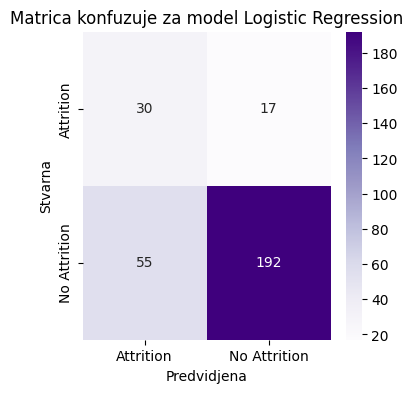

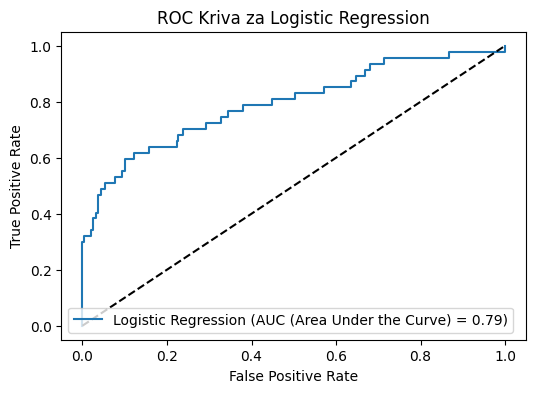

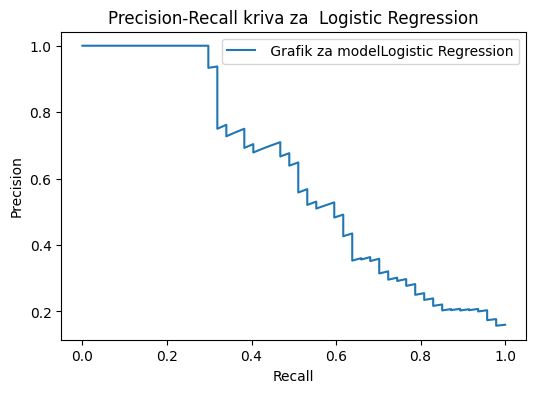

In [81]:
model_lr = LogisticRegression()
model_lr.fit(X_train_bal, y_train_bal)
y_pred_lr = model_lr.predict(X_test)
y_pred_prob_lr = model_lr.predict_proba(X_test)[:, 1]
prikaz_metrika("Logistic Regression", y_test, y_pred_lr, y_pred_prob_lr)

Tip algoritma/modela: DecisionTreeClassifier
#################################
Accuracy (Tačnost): 0.7142857142857143
#################################
Precision (Preciznost): 0.2465753424657534
#################################
Recall(odziv): 0.3829787234042553
###############################
F1 Score: 0.3
ROC AUC: 0.5801533293134638
Confusion Matrix (matrica konfuzije):
[[192  55]
 [ 29  18]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       247
           1       0.25      0.38      0.30        47

    accuracy                           0.71       294
   macro avg       0.56      0.58      0.56       294
weighted avg       0.77      0.71      0.74       294




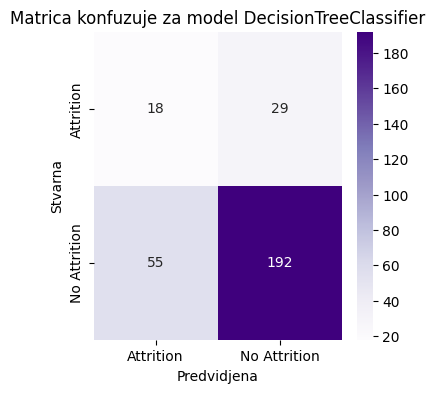

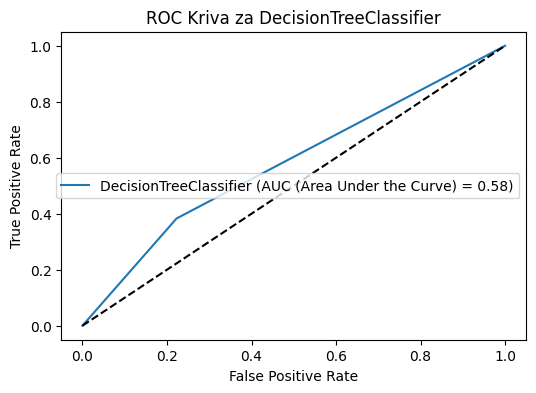

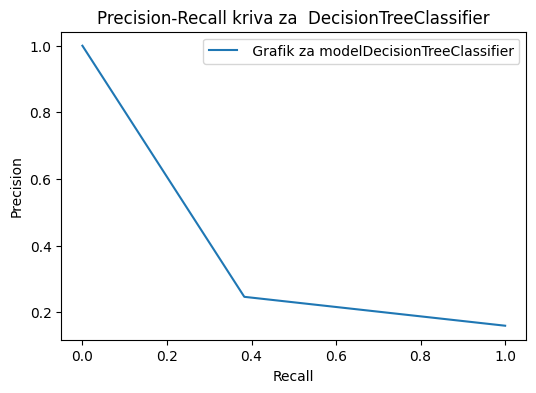

In [83]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_bal, y_train_bal)
y_pred_dt = model_dt.predict(X_test)
y_pred_prob_dt = model_dt.predict_proba(X_test)[:, 1]
prikaz_metrika("DecisionTreeClassifier", y_test, y_pred_dt, y_pred_prob_dt)

Tip algoritma/modela: Random Forest
#################################
Accuracy (Tačnost): 0.8503401360544217
#################################
Precision (Preciznost): 0.5517241379310345
#################################
Recall(odziv): 0.3404255319148936
###############################
F1 Score: 0.4210526315789473
ROC AUC: 0.7473511930398828
Confusion Matrix (matrica konfuzije):
[[234  13]
 [ 31  16]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       247
           1       0.55      0.34      0.42        47

    accuracy                           0.85       294
   macro avg       0.72      0.64      0.67       294
weighted avg       0.83      0.85      0.84       294




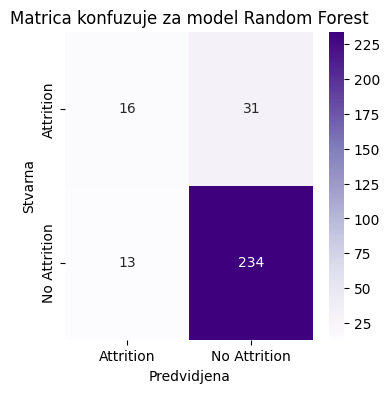

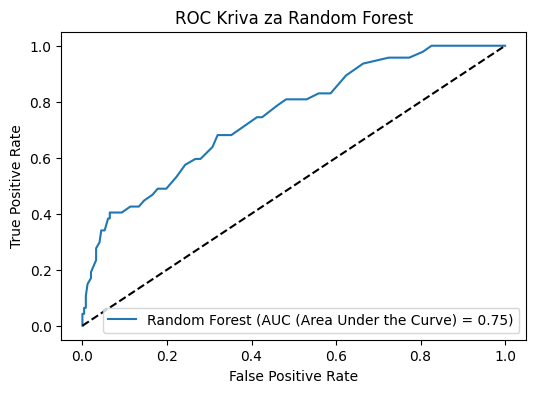

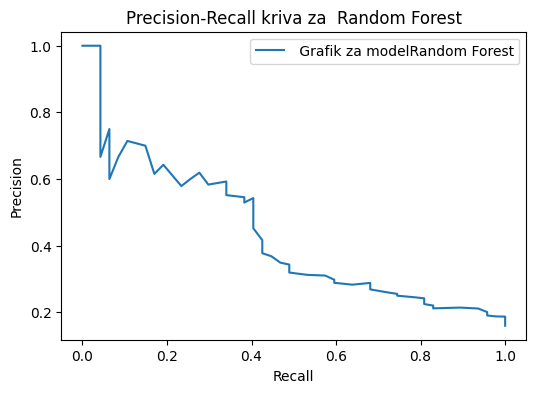

In [84]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_bal, y_train_bal)
y_pred_rf = model_rf.predict(X_test)
y_pred_prob_rf = model_rf.predict_proba(X_test)[:, 1]
prikaz_metrika("Random Forest", y_test, y_pred_rf, y_pred_prob_rf)

Tip algoritma/modela: Gradient Boosting
#################################
Accuracy (Tačnost): 0.8129251700680272
#################################
Precision (Preciznost): 0.42857142857142855
#################################
Recall(odziv): 0.5106382978723404
###############################
F1 Score: 0.46601941747572817
ROC AUC: 0.7230596950641743
Confusion Matrix (matrica konfuzije):
[[215  32]
 [ 23  24]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       247
           1       0.43      0.51      0.47        47

    accuracy                           0.81       294
   macro avg       0.67      0.69      0.68       294
weighted avg       0.83      0.81      0.82       294




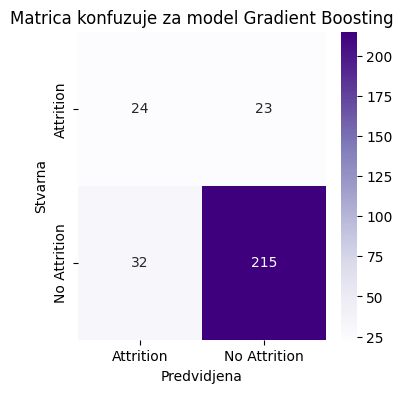

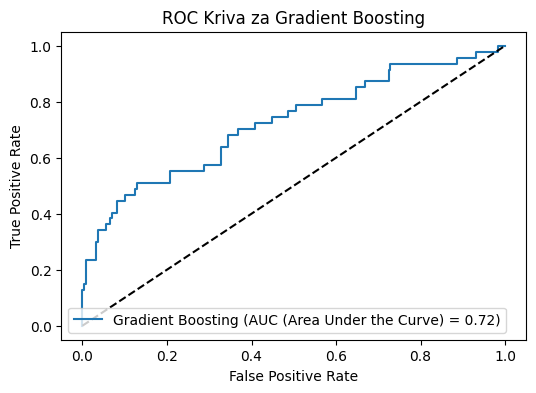

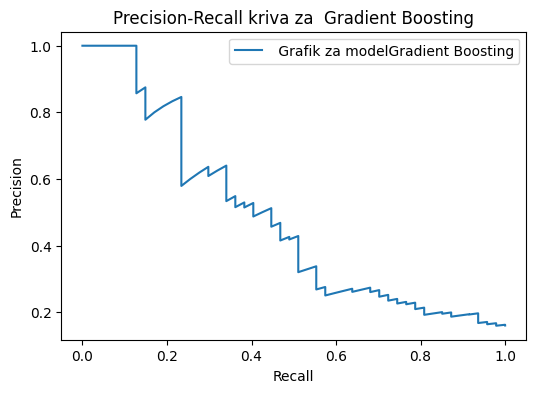

In [85]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train_bal, y_train_bal)
y_pred_gb = model_gb.predict(X_test)
y_pred_prob_gb = model_gb.predict_proba(X_test)[:, 1]
prikaz_metrika("Gradient Boosting", y_test, y_pred_gb, y_pred_prob_gb)

Tip algoritma/modela: AdaBoost
#################################
Accuracy (Tačnost): 0.7789115646258503
#################################
Precision (Preciznost): 0.37142857142857144
#################################
Recall(odziv): 0.5531914893617021
###############################
F1 Score: 0.4444444444444445
ROC AUC: 0.7183219915582737
Confusion Matrix (matrica konfuzije):
[[203  44]
 [ 21  26]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       247
           1       0.37      0.55      0.44        47

    accuracy                           0.78       294
   macro avg       0.64      0.69      0.65       294
weighted avg       0.82      0.78      0.80       294




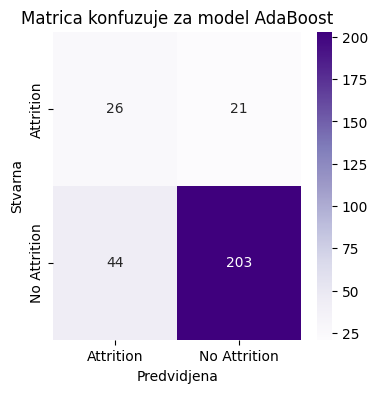

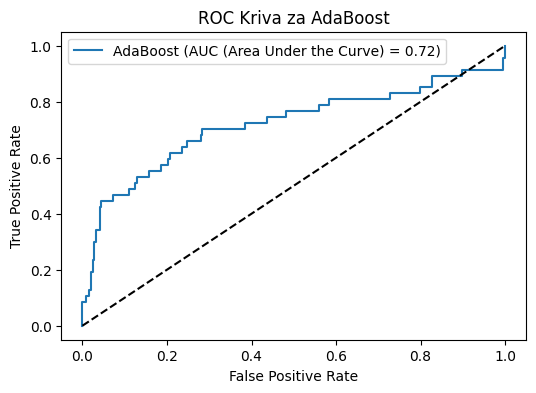

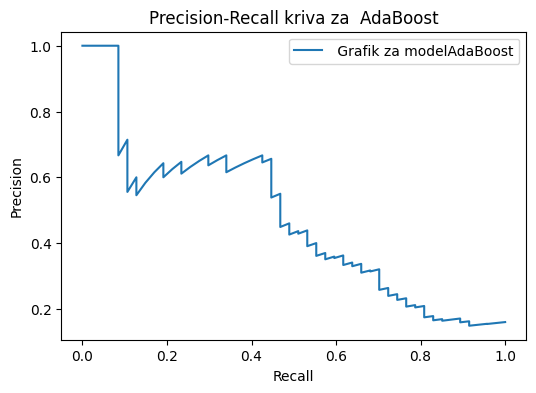

In [86]:
model_ab = AdaBoostClassifier()
model_ab.fit(X_train_bal, y_train_bal)
y_pred_ab = model_ab.predict(X_test)
y_pred_prob_ab = model_ab.predict_proba(X_test)[:, 1]
prikaz_metrika("AdaBoost", y_test, y_pred_ab, y_pred_prob_ab)

Tip algoritma/modela: Bagging
#################################
Accuracy (Tačnost): 0.8027210884353742
#################################
Precision (Preciznost): 0.36585365853658536
#################################
Recall(odziv): 0.3191489361702128
###############################
F1 Score: 0.34090909090909094
ROC AUC: 0.6990696873115686
Confusion Matrix (matrica konfuzije):
[[221  26]
 [ 32  15]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       247
           1       0.37      0.32      0.34        47

    accuracy                           0.80       294
   macro avg       0.62      0.61      0.61       294
weighted avg       0.79      0.80      0.80       294




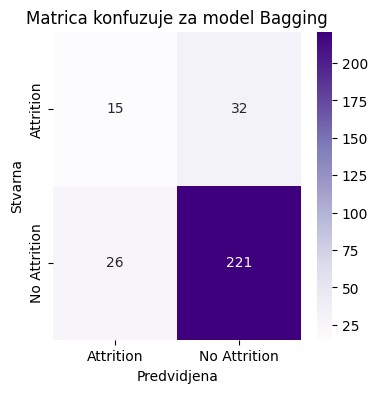

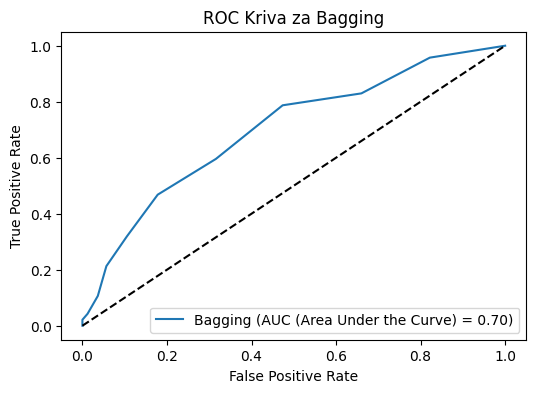

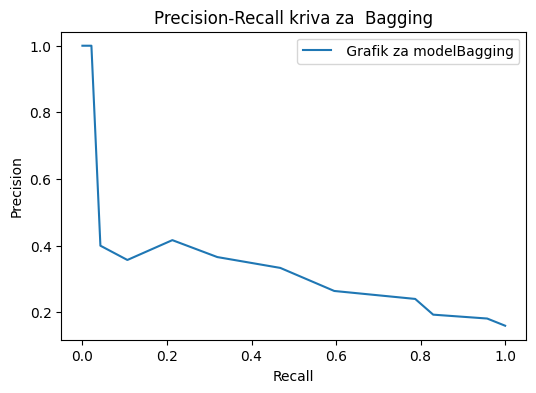

In [87]:
model_bg = BaggingClassifier()
model_bg.fit(X_train_bal, y_train_bal)
y_pred_bg = model_bg.predict(X_test)
y_pred_prob_bg = model_bg.predict_proba(X_test)[:, 1]
prikaz_metrika("Bagging", y_test, y_pred_bg, y_pred_prob_bg)

Tip algoritma/modela: XGBoost
#################################
Accuracy (Tačnost): 0.8367346938775511
#################################
Precision (Preciznost): 0.4864864864864865
#################################
Recall(odziv): 0.3829787234042553
###############################
F1 Score: 0.42857142857142855
ROC AUC: 0.7271944181238694
Confusion Matrix (matrica konfuzije):
[[228  19]
 [ 29  18]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       247
           1       0.49      0.38      0.43        47

    accuracy                           0.84       294
   macro avg       0.69      0.65      0.67       294
weighted avg       0.82      0.84      0.83       294




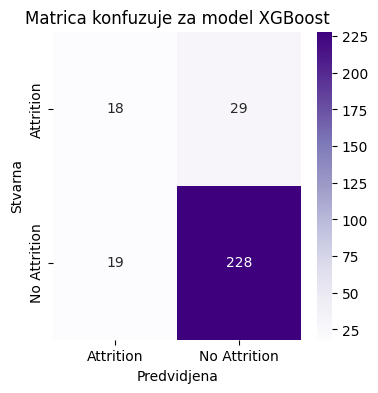

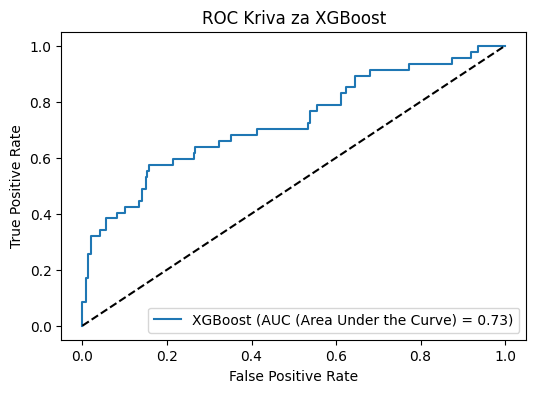

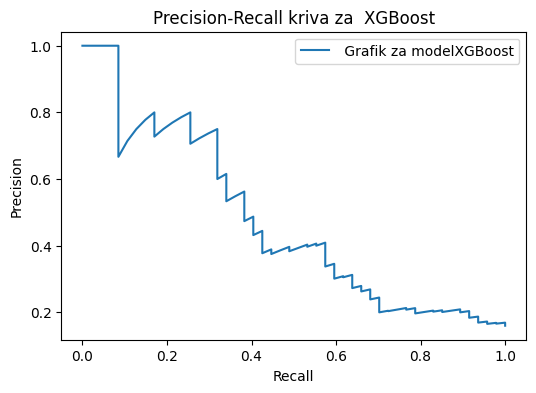

In [88]:
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_bal, y_train_bal)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]
prikaz_metrika("XGBoost", y_test, y_pred_xgb, y_pred_prob_xgb)

[LightGBM] [Info] Number of positive: 986, number of negative: 986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000662 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Tip algoritma/modela: LightGBM
#################################
Accuracy (Tačnost): 0.8469387755102041
#################################
Precision (Preciznost): 0.53125
#################################
Recall(odziv): 0.3617021276595745
###############################
F1 Score: 0.4303797468354431
ROC AUC: 0.7134981479886294
Confusion Matrix (matrica konfuzije):
[[232  15]
 [ 30  17]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       247
           1       

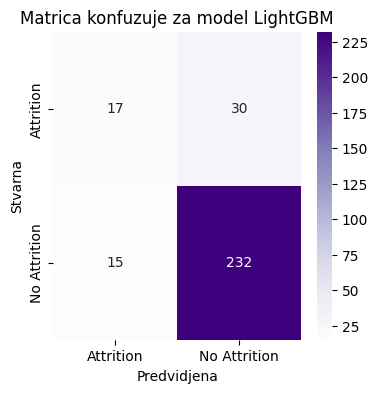

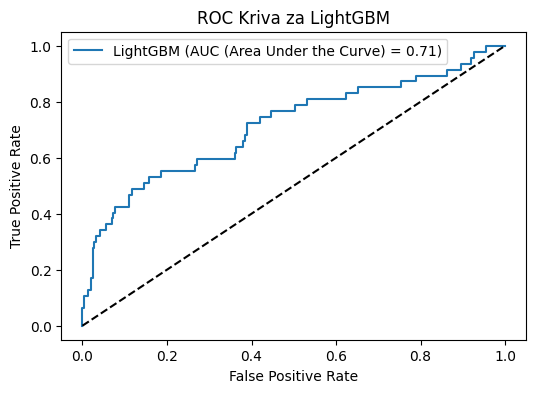

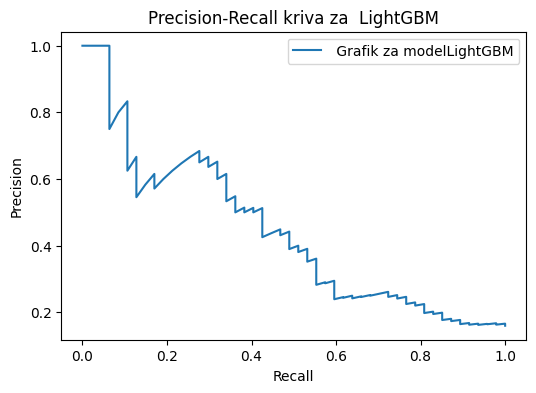

In [89]:
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train_bal, y_train_bal)
y_pred_lgb = model_lgb.predict(X_test)
y_pred_prob_lgb = model_lgb.predict_proba(X_test)[:, 1]
prikaz_metrika("LightGBM", y_test, y_pred_lgb, y_pred_prob_lgb)

Tip algoritma/modela: CatBoost
#################################
Accuracy (Tačnost): 0.8469387755102041
#################################
Precision (Preciznost): 0.5263157894736842
#################################
Recall(odziv): 0.425531914893617
###############################
F1 Score: 0.4705882352941176
ROC AUC: 0.7236626755103799
Confusion Matrix (matrica konfuzije):
[[229  18]
 [ 27  20]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       247
           1       0.53      0.43      0.47        47

    accuracy                           0.85       294
   macro avg       0.71      0.68      0.69       294
weighted avg       0.84      0.85      0.84       294




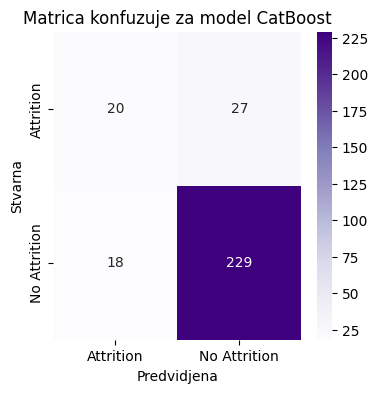

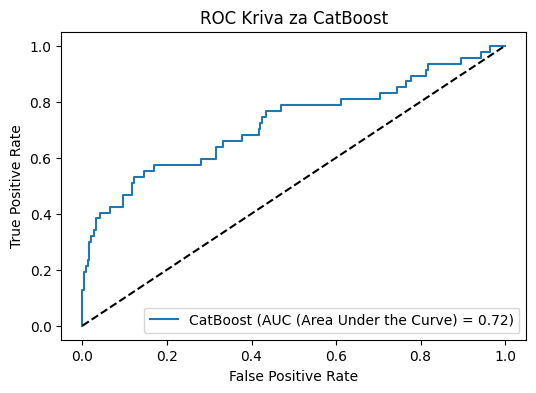

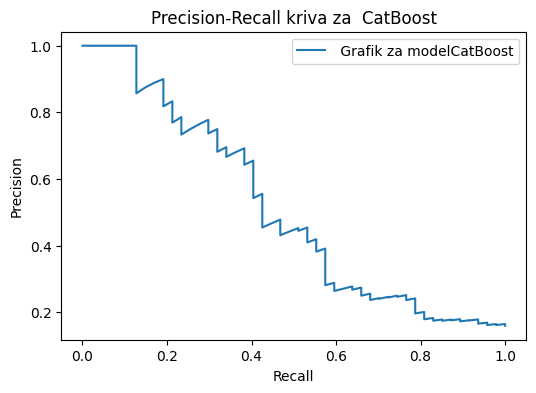

In [90]:
model_cb = cb.CatBoostClassifier(silent=True)
model_cb.fit(X_train_bal, y_train_bal)
y_pred_cb = model_cb.predict(X_test)
y_pred_prob_cb = model_cb.predict_proba(X_test)[:, 1]
prikaz_metrika("CatBoost", y_test, y_pred_cb, y_pred_prob_cb)

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'Bagging': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 62, 127]
    },
    'CatBoost': {
        'iterations': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [3, 5, 7]
    }
}

In [93]:
##### sada  cemo imati jednu funkciju koja ce da radi Tuning umesto ponavljajucih linija koda kao ranije i onda se lakse gledaju rezultati

In [94]:
def treniranje_i_tjunovanje(model, param_grid, model_name):
    print(f"Treniranje {model_name} sa hiperparametrizacijom")
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train_bal, y_train_bal)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]
    
    prikaz_metrika(model_name + " (Sa tuningom)", y_test, y_pred, y_pred_prob)
    return grid_search.best_params_


Treniranje Logistic Regression sa hiperparametrizacijom
Tip algoritma/modela: Logistic Regression (Sa tuningom)
#################################
Accuracy (Tačnost): 0.7551020408163265
#################################
Precision (Preciznost): 0.35294117647058826
#################################
Recall(odziv): 0.6382978723404256
###############################
F1 Score: 0.4545454545454546
ROC AUC: 0.7929192867602722
Confusion Matrix (matrica konfuzije):
[[192  55]
 [ 17  30]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       247
           1       0.35      0.64      0.45        47

    accuracy                           0.76       294
   macro avg       0.64      0.71      0.65       294
weighted avg       0.83      0.76      0.78       294




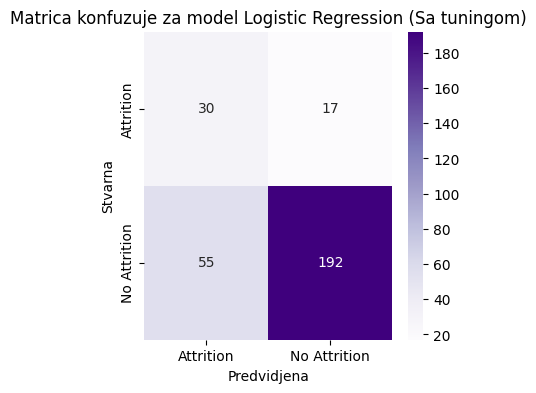

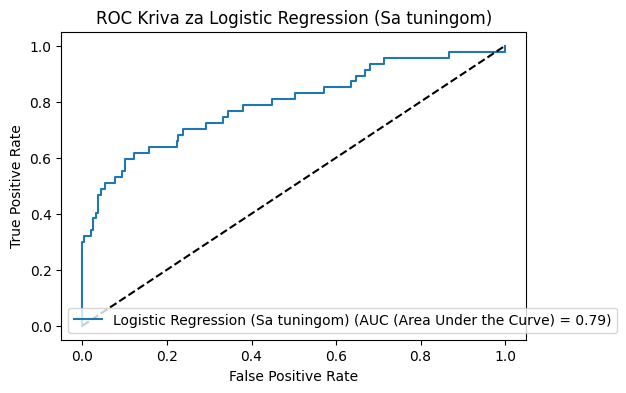

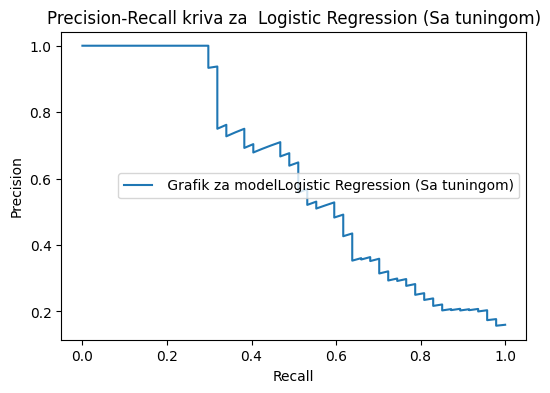

In [95]:
best_parametri_lr = treniranje_i_tjunovanje(LogisticRegression(), param_grids['Logistic Regression'], "Logistic Regression")

Treniranje Decision Tree sa hiperparametrizacijom
Tip algoritma/modela: Decision Tree (Sa tuningom)
#################################
Accuracy (Tačnost): 0.717687074829932
#################################
Precision (Preciznost): 0.2631578947368421
#################################
Recall(odziv): 0.425531914893617
###############################
F1 Score: 0.3252032520325203
ROC AUC: 0.5994056335601687
Confusion Matrix (matrica konfuzije):
[[191  56]
 [ 27  20]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       247
           1       0.26      0.43      0.33        47

    accuracy                           0.72       294
   macro avg       0.57      0.60      0.57       294
weighted avg       0.78      0.72      0.74       294




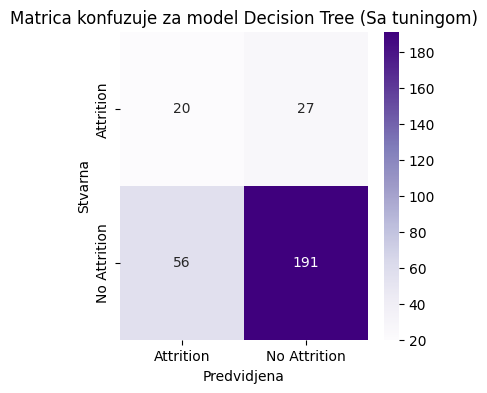

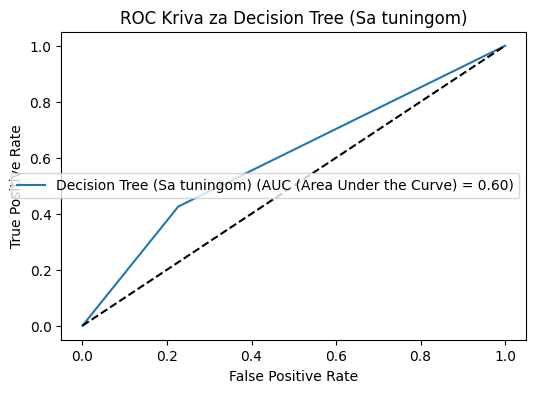

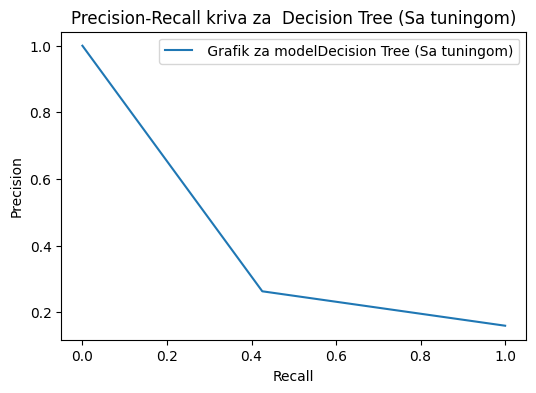

In [96]:
best_parametri_dt = treniranje_i_tjunovanje(DecisionTreeClassifier(), param_grids['Decision Tree'], "Decision Tree")

Treniranje Random Forest sa hiperparametrizacijom
Tip algoritma/modela: Random Forest (Sa tuningom)
#################################
Accuracy (Tačnost): 0.8503401360544217
#################################
Precision (Preciznost): 0.56
#################################
Recall(odziv): 0.2978723404255319
###############################
F1 Score: 0.3888888888888889
ROC AUC: 0.7268498578688949
Confusion Matrix (matrica konfuzije):
[[236  11]
 [ 33  14]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       247
           1       0.56      0.30      0.39        47

    accuracy                           0.85       294
   macro avg       0.72      0.63      0.65       294
weighted avg       0.83      0.85      0.83       294




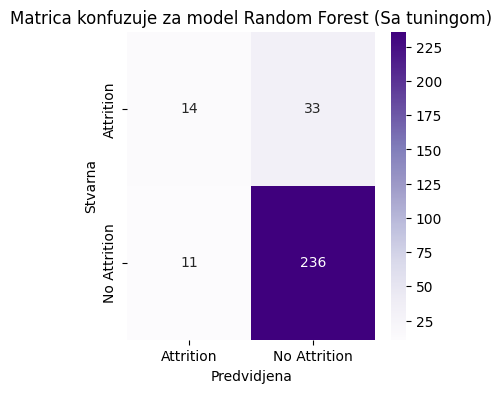

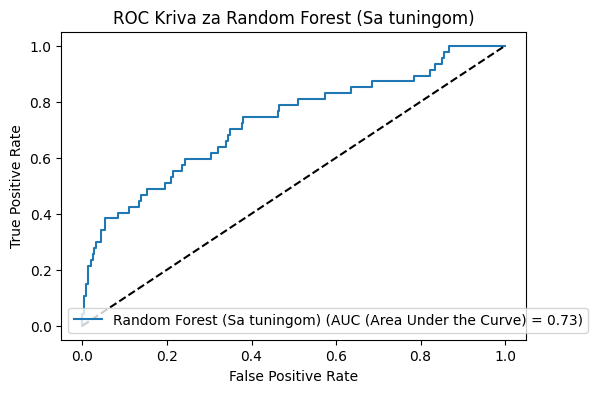

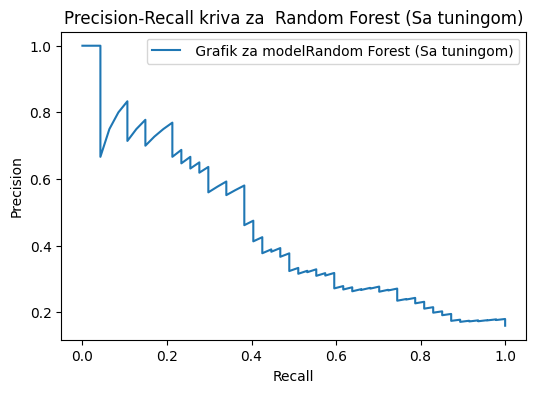

In [97]:
best_parametri_rf = treniranje_i_tjunovanje(RandomForestClassifier(), param_grids['Random Forest'], "Random Forest")

Treniranje Gradient Boosting sa hiperparametrizacijom
Tip algoritma/modela: Gradient Boosting (Sa tuningom)
#################################
Accuracy (Tačnost): 0.8537414965986394
#################################
Precision (Preciznost): 0.5769230769230769
#################################
Recall(odziv): 0.3191489361702128
###############################
F1 Score: 0.4109589041095891
ROC AUC: 0.7137565681798604
Confusion Matrix (matrica konfuzije):
[[236  11]
 [ 32  15]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.58      0.32      0.41        47

    accuracy                           0.85       294
   macro avg       0.73      0.64      0.66       294
weighted avg       0.83      0.85      0.84       294




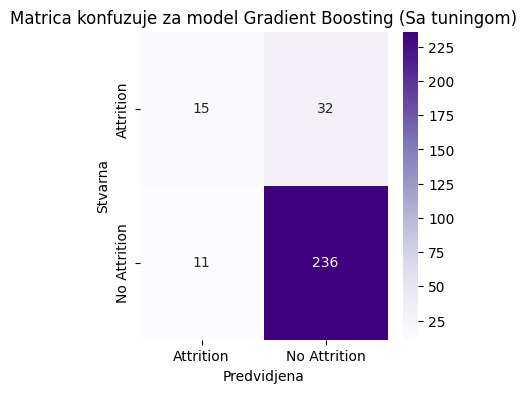

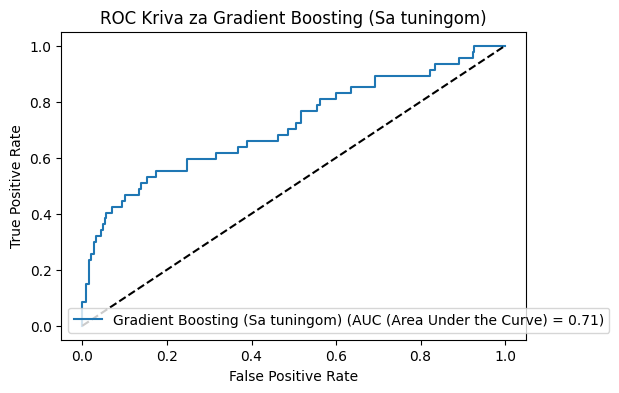

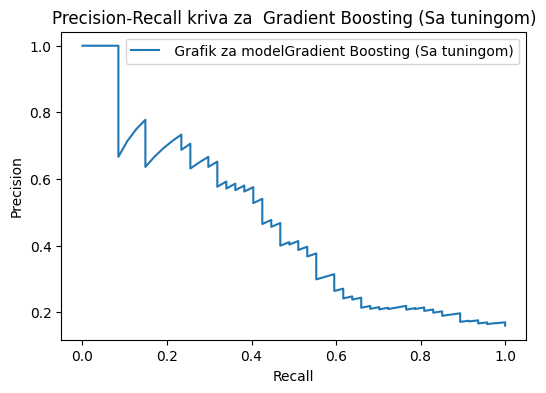

In [98]:
best_parametri_gb = treniranje_i_tjunovanje(GradientBoostingClassifier(), param_grids['Gradient Boosting'], "Gradient Boosting")

Treniranje AdaBoost sa hiperparametrizacijom
Tip algoritma/modela: AdaBoost (Sa tuningom)
#################################
Accuracy (Tačnost): 0.8231292517006803
#################################
Precision (Preciznost): 0.4576271186440678
#################################
Recall(odziv): 0.574468085106383
###############################
F1 Score: 0.509433962264151
ROC AUC: 0.7290033594624858
Confusion Matrix (matrica konfuzije):
[[215  32]
 [ 20  27]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       247
           1       0.46      0.57      0.51        47

    accuracy                           0.82       294
   macro avg       0.69      0.72      0.70       294
weighted avg       0.84      0.82      0.83       294




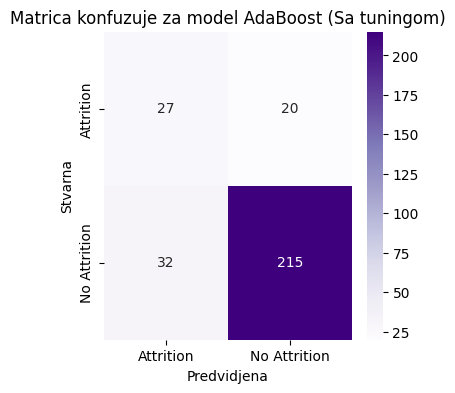

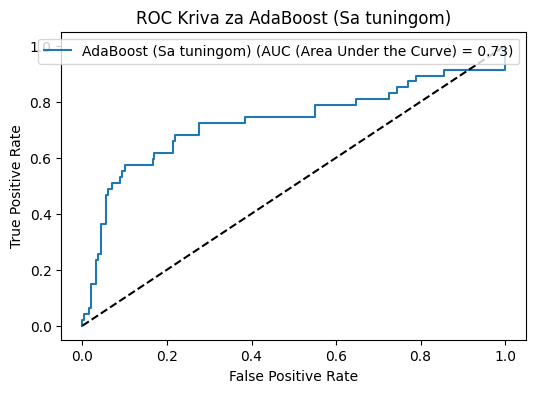

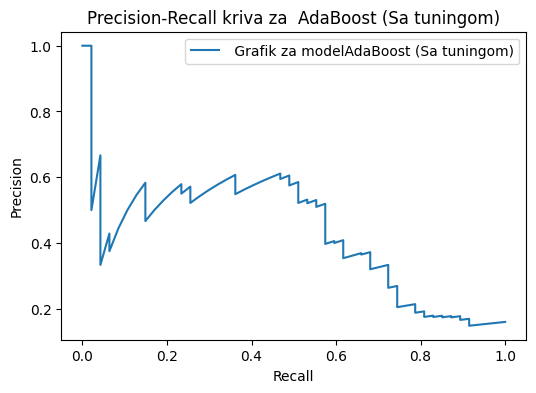

In [99]:
best_parametri_ab = treniranje_i_tjunovanje(AdaBoostClassifier(), param_grids['AdaBoost'], "AdaBoost")

Treniranje AdaBoost sa hiperparametrizacijom
Tip algoritma/modela: AdaBoost (Sa tuningom)
#################################
Accuracy (Tačnost): 0.8231292517006803
#################################
Precision (Preciznost): 0.4576271186440678
#################################
Recall(odziv): 0.574468085106383
###############################
F1 Score: 0.509433962264151
ROC AUC: 0.7290033594624858
Confusion Matrix (matrica konfuzije):
[[215  32]
 [ 20  27]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       247
           1       0.46      0.57      0.51        47

    accuracy                           0.82       294
   macro avg       0.69      0.72      0.70       294
weighted avg       0.84      0.82      0.83       294




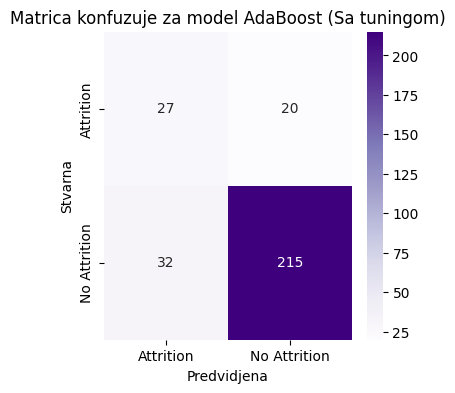

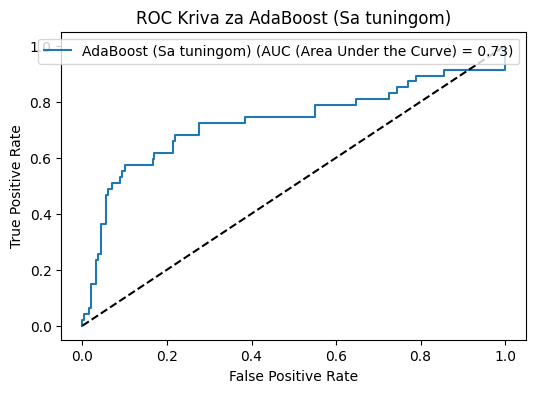

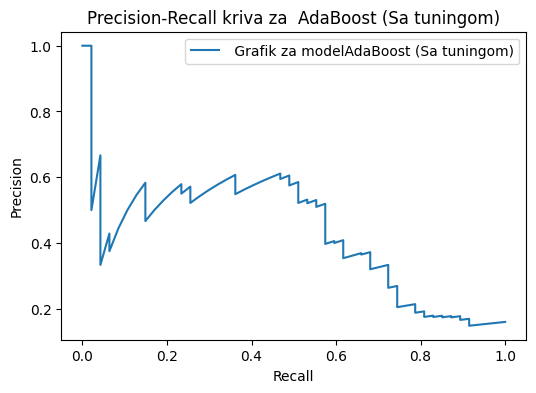

In [100]:
best_parametri_ab = treniranje_i_tjunovanje(AdaBoostClassifier(), param_grids['AdaBoost'], "AdaBoost")

Treniranje Bagging sa hiperparametrizacijom
Tip algoritma/modela: Bagging (Sa tuningom)
#################################
Accuracy (Tačnost): 0.8537414965986394
#################################
Precision (Preciznost): 0.5714285714285714
#################################
Recall(odziv): 0.3404255319148936
###############################
F1 Score: 0.4266666666666666
ROC AUC: 0.7389525368248773
Confusion Matrix (matrica konfuzije):
[[235  12]
 [ 31  16]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       247
           1       0.57      0.34      0.43        47

    accuracy                           0.85       294
   macro avg       0.73      0.65      0.67       294
weighted avg       0.83      0.85      0.84       294




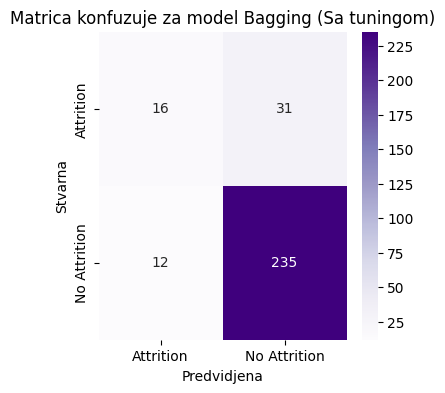

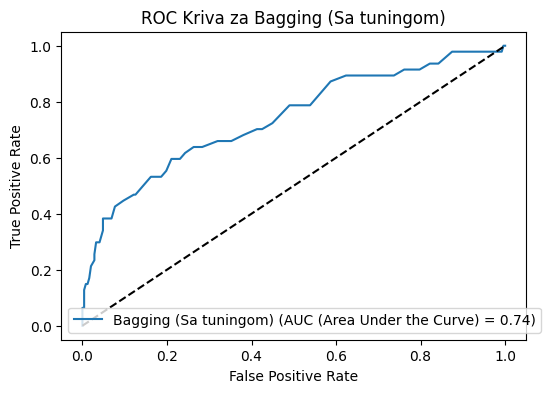

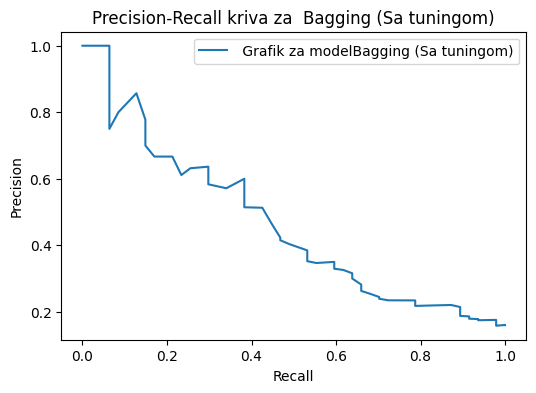

In [101]:
best_parametri_bg = treniranje_i_tjunovanje(BaggingClassifier(), param_grids['Bagging'], "Bagging")

Treniranje XGBoost sa hiperparametrizacijom
Tip algoritma/modela: XGBoost (Sa tuningom)
#################################
Accuracy (Tačnost): 0.8639455782312925
#################################
Precision (Preciznost): 0.6206896551724138
#################################
Recall(odziv): 0.3829787234042553
###############################
F1 Score: 0.47368421052631576
ROC AUC: 0.7288310793349987
Confusion Matrix (matrica konfuzije):
[[236  11]
 [ 29  18]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.62      0.38      0.47        47

    accuracy                           0.86       294
   macro avg       0.76      0.67      0.70       294
weighted avg       0.85      0.86      0.85       294




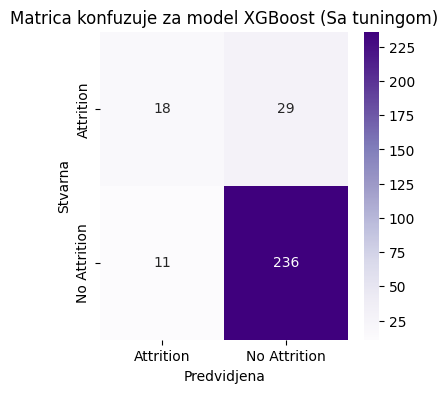

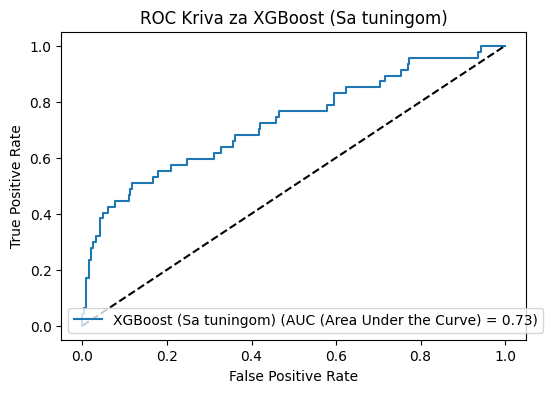

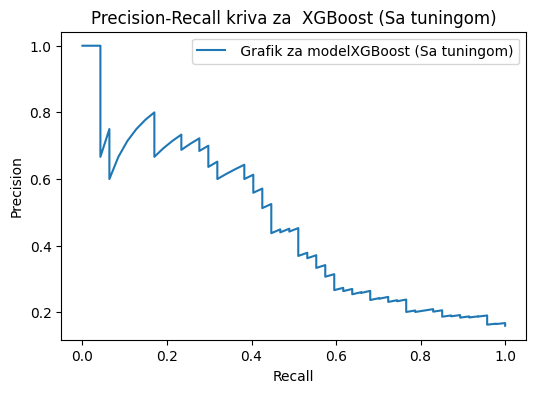

In [102]:
best_parametri_xgb = treniranje_i_tjunovanje(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grids['XGBoost'], "XGBoost")

Treniranje LightGBM sa hiperparametrizacijom
[LightGBM] [Info] Number of positive: 606, number of negative: 606
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1212, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 606, number of negative: 606
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1212, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 606, number of negative: 606
[LightGBM] [Info] Au

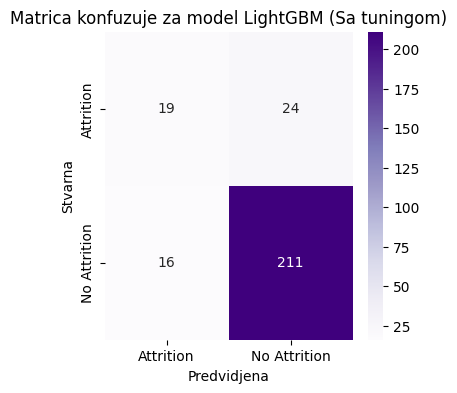

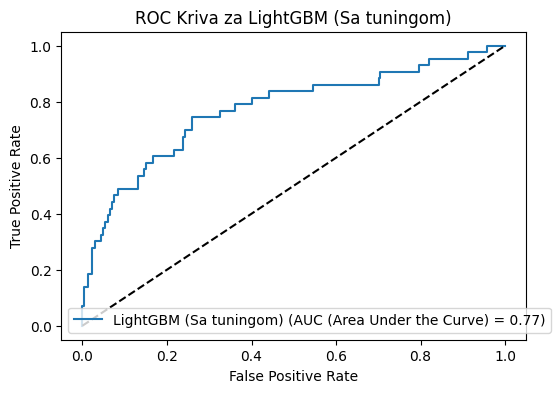

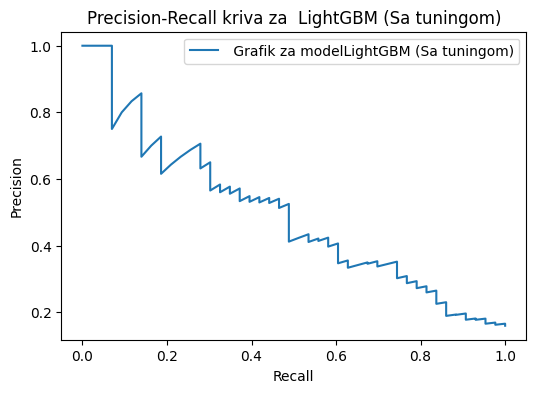

In [98]:
best_parametri_lgb = treniranje_i_tjunovanje(lgb.LGBMClassifier(), param_grids['LightGBM'], "LightGBM")

Treniranje CatBoost sa hiperparametrizacijom
Tip algoritma/modela: CatBoost (Sa tuningom)
#################################
Accuracy (Tačnost): 0.8481481481481481
#################################
Precision (Preciznost): 0.5227272727272727
#################################
Recall(odziv): 0.5348837209302325
###############################
F1 Score: 0.5287356321839081
ROC AUC: 0.7788136461428132
Confusion Matrix (matrica konfuzije):
[[206  21]
 [ 20  23]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       227
           1       0.52      0.53      0.53        43

    accuracy                           0.85       270
   macro avg       0.72      0.72      0.72       270
weighted avg       0.85      0.85      0.85       270




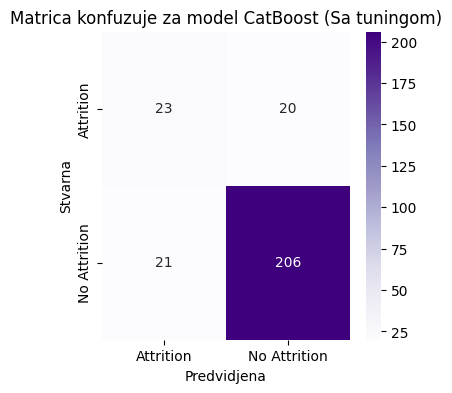

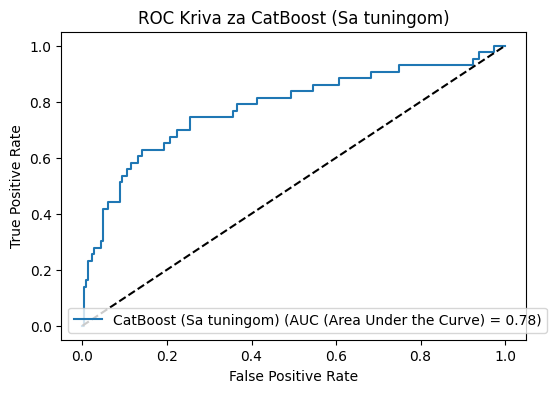

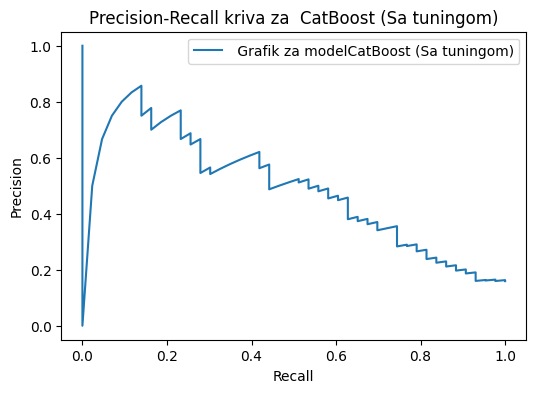

In [99]:
best_parametri_cb = treniranje_i_tjunovanje(cb.CatBoostClassifier(silent=True), param_grids['CatBoost'], "CatBoost")


Treniranje CatBoost sa hiperparametrizacijom
Tip algoritma/modela: CatBoost (Sa tuningom)
#################################
Accuracy (Tačnost): 0.8299319727891157
#################################
Precision (Preciznost): 0.45161290322580644
#################################
Recall(odziv): 0.2978723404255319
###############################
F1 Score: 0.3589743589743589
ROC AUC: 0.7137565681798604
Confusion Matrix (matrica konfuzije):
[[230  17]
 [ 33  14]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       247
           1       0.45      0.30      0.36        47

    accuracy                           0.83       294
   macro avg       0.66      0.61      0.63       294
weighted avg       0.81      0.83      0.82       294




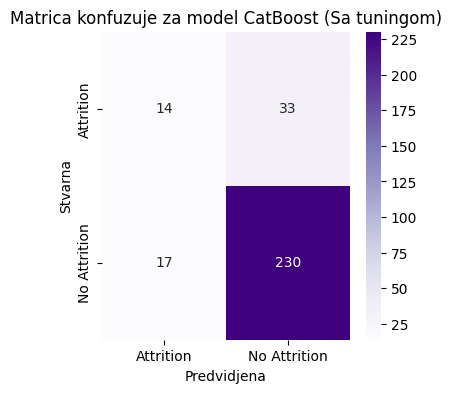

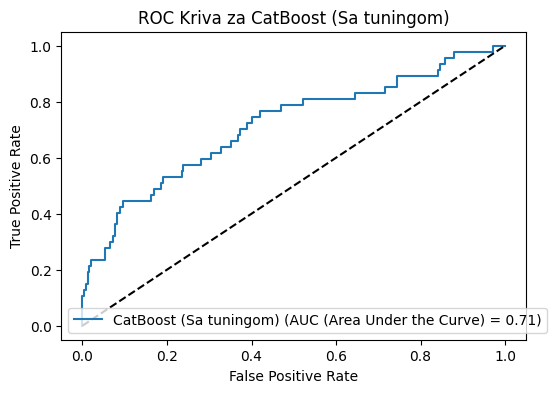

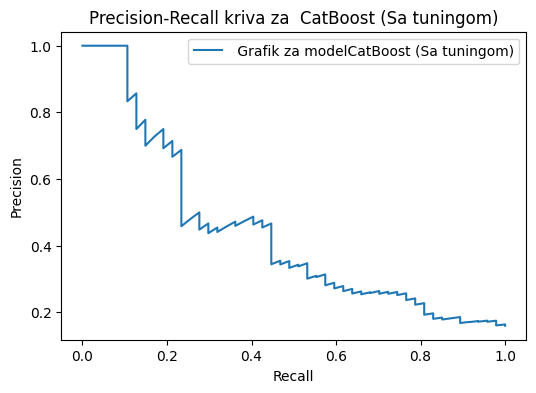

In [103]:
best_parametri_cb = treniranje_i_tjunovanje(cb.CatBoostClassifier(silent=True), param_grids['CatBoost'], "CatBoost")